In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [53]:
gpt_data=pd.read_csv("WellConnect_Synthetic_Dataset.csv")

## Gender comparison among depressed

What's the probability that someone is a woman/man given that they're depressed?

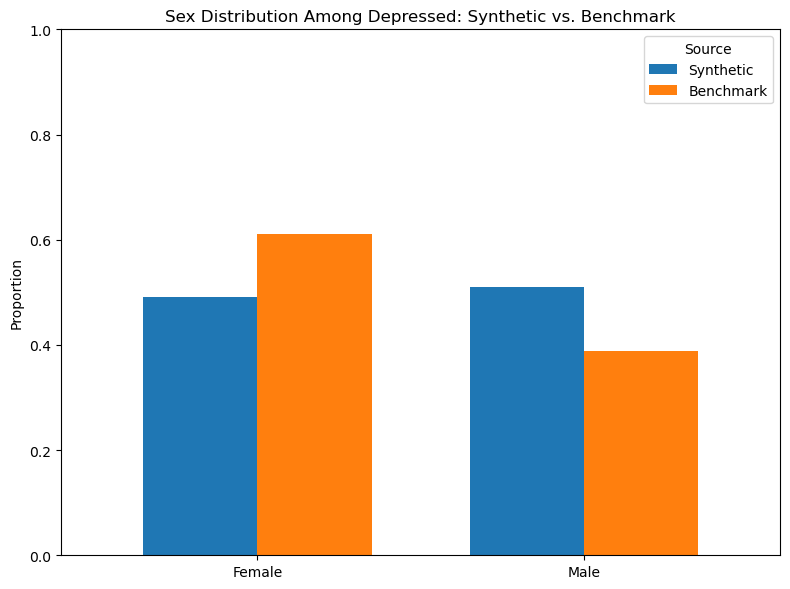

Chi-squared statistic: 45.6009, p-value: 0.0000


In [54]:
gpt_data_copy = gpt_data.copy()
#Benchmark data
P_DEP_GIVEN_F = 10.4 #staatvenz (depression prevalence)
P_DEP_GIVEN_M = 6.7 #staatvenz  (depression prevalence)
P_F = 8845204 / (8745468 + 8845204) #CBS
P_M = 8745468 / (8745468 + 8845204) #CBS
P_DEP = (P_DEP_GIVEN_F * P_F) + (P_DEP_GIVEN_M * P_M)
P_F_GIVEN_DEP = P_DEP_GIVEN_F * P_F / P_DEP
P_M_GIVEN_DEP = P_DEP_GIVEN_M * P_M / P_DEP


# Mapping (adjust as needed)
label_map = {
    'Vrouw': 'Female',
    'Man': 'Male'
}

# Map Dutch labels to English
sex_mapped = gpt_data_copy['Sex'].map(label_map)

# Compute synthetic proportions
empirical_counts = sex_mapped.value_counts(normalize=True)
empirical = pd.Series({
    'Female': empirical_counts.get('Female', 0),
    'Male': empirical_counts.get('Male', 0)
}, name='Synthetic')

# Benchmark: P(sex | depression)
benchmark = pd.Series({
    'Female': P_F_GIVEN_DEP,
    'Male': P_M_GIVEN_DEP
}, name='Benchmark')

# Combine and plot
df_plot = pd.concat([empirical, benchmark], axis=1)

# Plot
ax = df_plot.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.title('Sex Distribution Among Depressed: Synthetic vs. Benchmark')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

#significance
# observed and expected should be count vectors
observed = df_plot['Synthetic'].values * len(gpt_data_copy)
expected = df_plot['Benchmark'].values * len(gpt_data_copy)

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")


## Education comparison among depressed

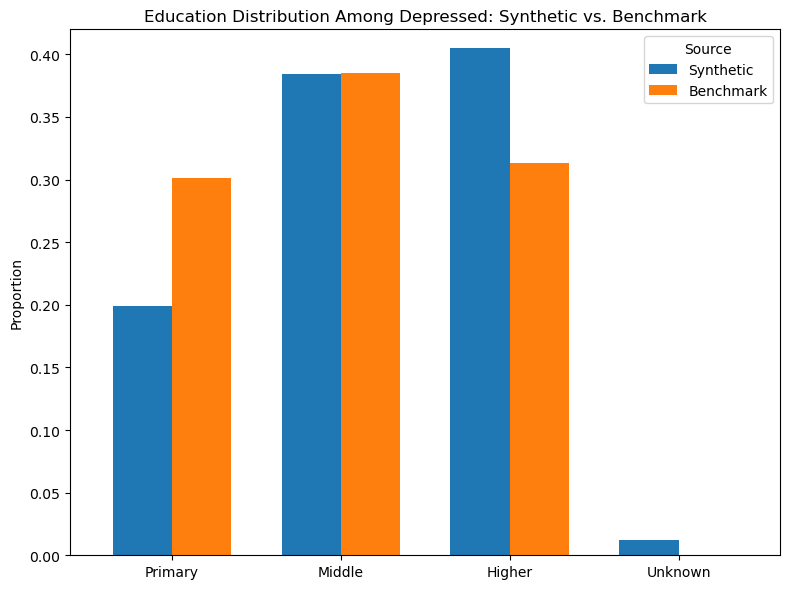

Chi-squared statistic: inf, p-value: 0.0000


/home/guoda/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [55]:
gpt_data_copy = gpt_data.copy()

# Benchmark data
P_PRIMARY_VMBO_MBO1 = 0.260 #CBS
P_HAVO_VWO_MBO2TO4 = 0.370 #CBS
P_HBO_UNI = 0.364 #CBS
P_DEP_GIVEN_PRIMARY_VMBO_MBO1 = 0.097 #staatvenz (depression prevalence)
P_DEP_GIVEN_HAVO_VWO_MBO2TO4 = 0.087 #staatvenz (depression prevalence)
P_DEP_GIVEN_HBO_UNI = 0.072 #staatvenz (depression prevalence)
P_DEP = (P_DEP_GIVEN_PRIMARY_VMBO_MBO1 * P_PRIMARY_VMBO_MBO1) + (P_DEP_GIVEN_HAVO_VWO_MBO2TO4 * P_HAVO_VWO_MBO2TO4) + (P_DEP_GIVEN_HBO_UNI * P_HBO_UNI)
P_PRIMARY_VMBO_MBO1_GIVEN_DEP = P_DEP_GIVEN_PRIMARY_VMBO_MBO1 * P_PRIMARY_VMBO_MBO1 / P_DEP
P_HAVO_VWO_MBO2TO4_GIVEN_DEP = P_DEP_GIVEN_HAVO_VWO_MBO2TO4 * P_HAVO_VWO_MBO2TO4 / P_DEP
P_HBO_UNI_GIVEN_DEP = P_DEP_GIVEN_HBO_UNI * P_HBO_UNI / P_DEP

# Define mapping from your raw education categories
edu_map = {
    'Geen opleiding': 'Primary',
    'Basisonderwijs': 'Primary',
    'Vmbo/Mavo': 'Primary',
    'Mbo (niveau 1-4)': 'Middle',  # note: groups 1–4 as Middle for simplicity
    'Mbo (niveau 1)': 'Primary',   # if separated in your data
    'Mbo (niveau 2-4)': 'Middle',  # optional refinement
    'Havo/Vwo': 'Middle',
    'HBO': 'Higher',
    'Universiteit (Bachelor, Master, of hoger)': 'Higher'
    # All else will fall into 'Unknown'
}

# Map education levels in your data
edu_raw = gpt_data_copy['EducationLevel']
edu_mapped = edu_raw.map(edu_map).fillna('Unknown')

# Compute synthetic proportions
edu_counts = edu_mapped.value_counts(normalize=True)
synthetic = pd.Series({
    'Primary': edu_counts.get('Primary', 0),
    'Middle': edu_counts.get('Middle', 0),
    'Higher': edu_counts.get('Higher', 0),
    'Unknown': edu_counts.get('Unknown', 0)
}, name='Synthetic')

# Benchmark: P(education | depression), from your prior calc
benchmark = pd.Series({
    'Primary': P_PRIMARY_VMBO_MBO1_GIVEN_DEP,
    'Middle': P_HAVO_VWO_MBO2TO4_GIVEN_DEP,
    'Higher': P_HBO_UNI_GIVEN_DEP,
    'Unknown': 1 - (P_PRIMARY_VMBO_MBO1_GIVEN_DEP + P_HAVO_VWO_MBO2TO4_GIVEN_DEP + P_HBO_UNI_GIVEN_DEP)
}, name='Benchmark')

# Combine and plot
df_plot = pd.concat([synthetic, benchmark], axis=1)

# Plot
ax = df_plot.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.title('Education Distribution Among Depressed: Synthetic vs. Benchmark')
plt.ylabel('Proportion')
plt.ylim(0, 0.42)
plt.xticks(rotation=0)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

# significance
# Convert proportions to counts
observed = df_plot['Synthetic'].values * len(gpt_data_copy)
expected = df_plot['Benchmark'].values * len(gpt_data_copy)

# Normalize expected counts to match total observed count
expected = expected * (observed.sum() / expected.sum())

# Perform chi-squared test
from scipy.stats import chisquare
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")


## Age comparison among depressed

/tmp/ipykernel_151831/427982171.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_totals = age_group_totals.groupby('AgeGroup')['Total'].sum()


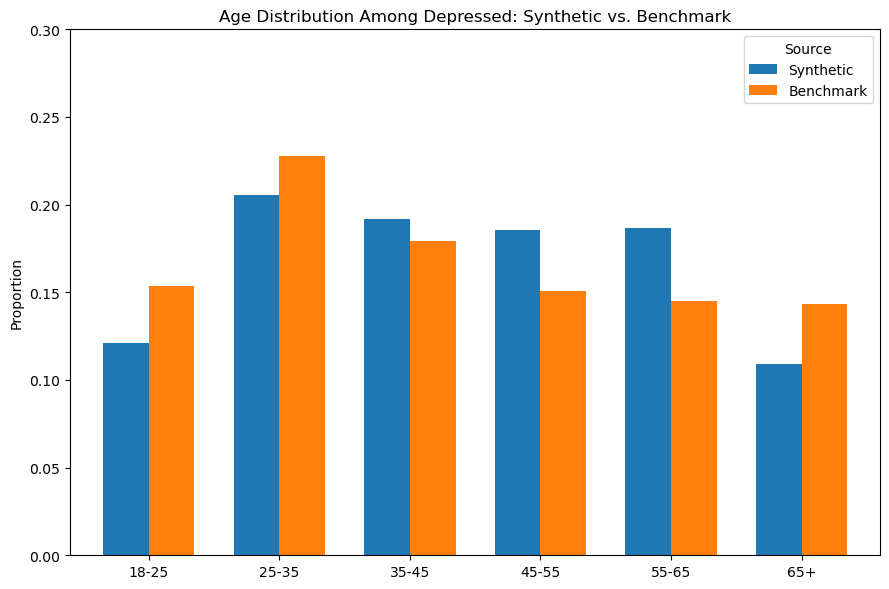

Chi-squared statistic: 28.4721, p-value: 0.0000


In [56]:
gpt_data_copy = gpt_data.copy()


# Load CBS data and process
age_group_totals = pd.read_csv("CBS Age composition in the Netherlands 2025 (estimate).csv", delimiter=';')
age_group_totals.columns = ['Age', 'Men', 'Women']

for col in ['Men', 'Women']:
    age_group_totals[col] = age_group_totals[col].str.replace(' ', '').str.replace('.', '', regex=False)
    age_group_totals[col] = pd.to_numeric(age_group_totals[col], errors='coerce').fillna(0).astype(int)


def extract_numeric_age(age_str):
    if 'or older' in age_str or '+' in age_str:
        return 105
    elif 'yrs' in age_str:
        return int(age_str.split(' ')[0])
    else:
        return None

age_group_totals['NumericAge'] = age_group_totals['Age'].apply(extract_numeric_age)
age_group_totals = age_group_totals.dropna(subset=['NumericAge'])

# Total population
age_group_totals['Total'] = age_group_totals['Men'] + age_group_totals['Women']

bins = [18, 25, 35, 45, 55, 65, 130]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
age_group_totals['AgeGroup'] = pd.cut(age_group_totals['NumericAge'], bins=bins, labels=labels, right=False)

# Group by bins
grouped_totals = age_group_totals.groupby('AgeGroup')['Total'].sum()
total_population = grouped_totals.sum()
P_AGE_GROUP = (grouped_totals / total_population).to_dict()

# Staatvenz: P(depression | age group)
P_DEP_GIVEN = {
    '18-25': 0.115,
    '25-35': 0.114,
    '35-45': 0.096,
    '45-55': 0.081,
    '55-65': 0.070,
    '65+':   0.046
}

# Compute P(depression)
P_DEP = sum(P_DEP_GIVEN[age] * P_AGE_GROUP[age] for age in P_DEP_GIVEN)

# Compute P(age group | depression)
P_AGE_GIVEN_DEP = {
    age: (P_DEP_GIVEN[age] * P_AGE_GROUP[age]) / P_DEP
    for age in P_DEP_GIVEN
}

# Prepare synthetic data
gpt_data_copy['AgeGroup'] = pd.cut(gpt_data_copy['Age'], bins=bins, labels=labels, right=False)
synthetic_props = gpt_data_copy['AgeGroup'].value_counts(normalize=True).reindex(labels, fill_value=0)

# Combine and plot
df_plot = pd.DataFrame({
    'Synthetic': synthetic_props,
    'Benchmark': pd.Series(P_AGE_GIVEN_DEP)
})

df_plot.plot(kind='bar', figsize=(9, 6), width=0.7)
plt.title('Age Distribution Among Depressed: Synthetic vs. Benchmark')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 0.3)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

#significance
# observed and expected should be count vectors
observed = df_plot['Synthetic'].values * len(gpt_data_copy)
expected = df_plot['Benchmark'].values * len(gpt_data_copy)

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")


## Age gender comparison among depressed (benchmark at the GP office)

/tmp/ipykernel_151831/3404250986.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'SexMapped']).size().rename('count').reset_index()
/tmp/ipykernel_151831/3404250986.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['Synthetic'] = grouped['count'] / grouped.groupby('AgeGroup')['count'].transform('sum')


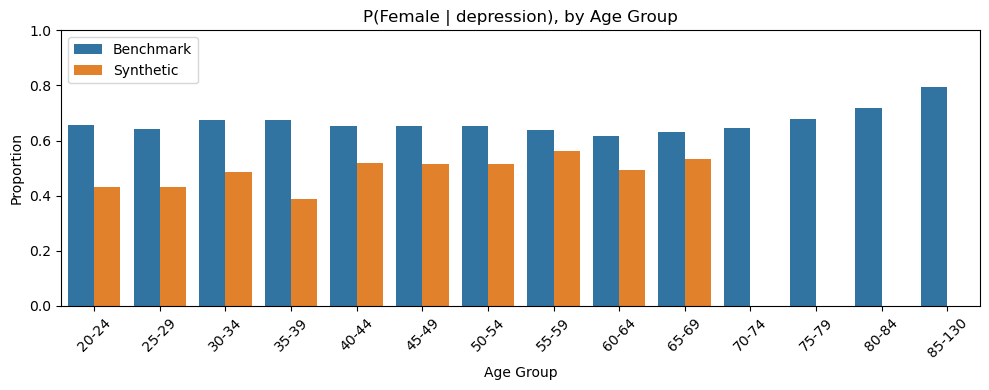

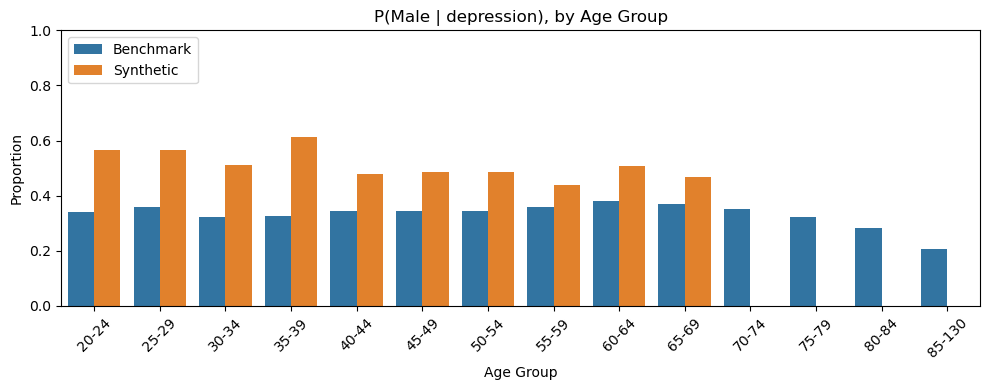

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CBS age-sex population data
cbs = pd.read_csv("CBS Age composition in the Netherlands 2025 (estimate).csv", delimiter=';')
cbs.columns = ['Age', 'Men', 'Women']
for col in ['Men', 'Women']:
    cbs[col] = cbs[col].str.replace(' ', '').str.replace('.', '', regex=False).astype(int)
cbs['NumericAge'] = cbs['Age'].str.extract(r'(\d+)').astype(int)

# Load Staatvenz depression prevalence by age-sex
staat = pd.read_csv("staatvenz_depression_prevalence_at_GP_offices.csv", delimiter=';')
staat.columns = ['AgeGroup', 'Men', 'Women']

# Helper to extract age range bounds
def parse_bounds(s):
    if '+' in s or 'ouder' in s:
        start = int(s.split()[0])
        return start, 130
    start, end = map(int, s.split()[0].split('-'))
    return start, end

# Calculate benchmark P(sex | depression, age)
bench_list = []
for _, row in staat.iterrows():
    age_lower, age_upper = parse_bounds(row['AgeGroup'])
    if age_upper < 20:
        continue  # skip child categories

    subset = cbs[(cbs['NumericAge'] >= age_lower) & (cbs['NumericAge'] <= age_upper)]
    m = subset['Men'].sum()
    f = subset['Women'].sum()
    if m + f == 0:
        continue

    pm_age = m / (m + f)
    pf_age = f / (m + f)
    pym = row['Men'] / 100
    pyf = row['Women'] / 100
    pdep_age = pym * pm_age + pyf * pf_age

    bench_list.extend([
        {'AgeGroup': f"{age_lower}-{age_upper}", 'Sex': 'Male',
         'Benchmark': (pym * pm_age) / pdep_age},
        {'AgeGroup': f"{age_lower}-{age_upper}", 'Sex': 'Female',
         'Benchmark': (pyf * pf_age) / pdep_age}
    ])
benchmark_df = pd.DataFrame(bench_list)

# Prepare synthetic data
df = gpt_data.copy()
df['SexMapped'] = df['Sex'].map({'Man': 'Male', 'Vrouw': 'Female'})
df = df[df['Age'] >= 20]

# Align synthetic age groups to Staatvenz bins
age_bins = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,130]
age_labels = [f"{i}-{i+4}" for i in range(20,85,5)] + ['85-130']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Compute P(sex | depression, age) in synthetic data
grouped = df.groupby(['AgeGroup', 'SexMapped']).size().rename('count').reset_index()
grouped['Synthetic'] = grouped['count'] / grouped.groupby('AgeGroup')['count'].transform('sum')
synth = grouped[['AgeGroup', 'SexMapped', 'Synthetic']].rename(columns={'SexMapped': 'Sex'})

# Merge and reshape
plot_df = pd.merge(benchmark_df, synth, on=['AgeGroup', 'Sex'], how='outer').melt(
    id_vars=['AgeGroup', 'Sex'],
    value_vars=['Benchmark', 'Synthetic'],
    var_name='Source', value_name='Proportion'
).dropna()

# Split the data by sex
plot_f = plot_df[plot_df['Sex'] == 'Female']
plot_m = plot_df[plot_df['Sex'] == 'Male']

# Plot for females
plt.figure(figsize=(10, 4))
sns.barplot(data=plot_f, x='AgeGroup', y='Proportion', hue='Source', ci=None)
plt.title("P(Female | depression), by Age Group")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title="")
plt.tight_layout()
plt.show()

# Plot for males
plt.figure(figsize=(10, 4))
sns.barplot(data=plot_m, x='AgeGroup', y='Proportion', hue='Source', ci=None)
plt.title("P(Male | depression), by Age Group")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title="")
plt.tight_layout()
plt.show()


In [ ]:
#Significance
# Get all unique age groups from benchmark
all_age_groups = plot_df['AgeGroup'].unique()

for sex in ['Male', 'Female']:
    sub = plot_df[plot_df['Sex'] == sex]

    # Extract and reindex with full age group list
    observed = (
        sub[sub['Source'] == 'Synthetic']
        .set_index('AgeGroup')
        .reindex(all_age_groups, fill_value=0)
        .sort_index()['Proportion']
        .values
    )

    expected = (
        sub[sub['Source'] == 'Benchmark']
        .set_index('AgeGroup')
        .reindex(all_age_groups, fill_value=0)
        .sort_index()['Proportion']
        .values
    )

    # Normalize expected to observed sum
    expected = expected * observed.sum() / expected.sum()

    chi2, p = chisquare(f_obs=observed, f_exp=expected)
    print(f"Chi-squared test for {sex}: statistic = {chi2:.4f}, p-value = {p:.4f}")


Chi-squared test for Male: statistic = 1.8221, p-value = 0.9999
Chi-squared test for Female: statistic = 2.2267, p-value = 0.9996


## Ethnicity, age, sex comparison among depressed

Clean the data from CBS and create a marginal distribution table P(group|depression) to be comparable to my data

In [ ]:
# --- Step 1: Load and process CBS population data ---
population_probs = pd.read_csv("CBS_population_by_origin_age_sex.csv", delimiter=';', skiprows=6)

# Extract numeric age and create age group
population_probs['Age'] = population_probs['Leeftijd'].str.extract(r'(\d+)').astype(float)
population_probs = population_probs.dropna(subset=['Age'])
bins = [25, 45, 65, float('inf')]
labels = ['25-45', '45-65', '65+']
population_probs['AgeGroup'] = pd.cut(population_probs['Age'], bins=bins, labels=labels, right=False)

# Translate column labels to English for clarity
population_probs = population_probs.rename(columns={
    'Geslacht': 'Sex',
    'Herkomstland': 'Origin',
    'aantal': 'Count'
})

# Standardize values
population_probs['Origin'] = population_probs['Origin'].replace({
    'Nederland': 'Netherlands',
    'Europa (exclusief Nederland)': 'Europe (excl. Netherlands)',
    'Buiten Europa': 'Outside Europe',
}).str.strip()

population_probs['Sex'] = population_probs['Sex'].replace({
    'Mannen': 'Male',
    'Vrouwen': 'Female',
    'Totaal mannen en vrouwen': 'Total'
}).str.strip()

# Group by AgeGroup, Sex, Origin and compute P(age, sex, origin)
grouped_pop = (
    population_probs.groupby(['AgeGroup', 'Sex', 'Origin'])['Count']
    .sum()
    .reset_index()
)

total_pop = grouped_pop['Count'].sum()
grouped_pop['P_age_sex_origin'] = grouped_pop['Count'] / total_pop

# --- Step 2: Load and process CBS depression prevalence data ---
depression_raw = pd.read_csv("CBS_depression_by_origin_age_sex.csv", delimiter=';', skiprows=6, header=None)
depression_raw.columns = ['Sex', 'AgeGroup', 'Origin', 'P_dep_given']

# Standardize and clean
depression_raw['P_dep_given'] = depression_raw['P_dep_given'].str.replace(',', '.').str.replace('%', '').astype(float) / 100
depression_raw['Sex'] = depression_raw['Sex'].replace({
    'Mannen': 'Male',
    'Vrouwen': 'Female',
    'Totaal mannen en vrouwen': 'Total'
}).str.strip()

depression_raw['Origin'] = (
    depression_raw['Origin']
    .str.strip()
    .str.replace('Herkomstland: ', '', regex=False)
    .replace({
        'Nederland': 'Netherlands',
        'Europa (excl. Nederland)': 'Europe (excl. Netherlands)',
        'Buiten Europa': 'Outside Europe'
    })
    .str.strip()
)


depression_raw['AgeGroup'] = depression_raw['AgeGroup'].replace({
    '25 tot 45 jaar': '25-45',
    '45 tot 65 jaar': '45-65',
    '65 jaar of ouder': '65+'
}).str.strip()

# Filter out category 'Totaal' from both datasets
population_probs = population_probs[population_probs['Origin'] != 'Totaal']

# --- Step 3: Merge and compute P(group | depression) ---
merged = pd.merge(
    grouped_pop,
    depression_raw,
    how='inner',
    left_on=['AgeGroup', 'Sex', 'Origin'],
    right_on=['AgeGroup', 'Sex', 'Origin']
)

merged['joint'] = merged['P_dep_given'] * merged['P_age_sex_origin']
P_dep = merged['joint'].sum()
merged['P_group_given_dep'] = merged['joint'] / P_dep

# --- Final Output ---
final = merged[['AgeGroup', 'Sex', 'Origin', 'P_group_given_dep']]
print(final)


   AgeGroup     Sex                      Origin  P_group_given_dep
0     25-45  Female  Europe (excl. Netherlands)           0.014698
1     25-45  Female                 Netherlands           0.060867
2     25-45  Female              Outside Europe           0.027801
3     25-45    Male  Europe (excl. Netherlands)           0.013645
4     25-45    Male                 Netherlands           0.053807
5     25-45    Male              Outside Europe           0.025738
6     25-45   Total  Europe (excl. Netherlands)           0.028308
7     25-45   Total                 Netherlands           0.114704
8     25-45   Total              Outside Europe           0.053590
9     45-65  Female  Europe (excl. Netherlands)           0.010758
10    45-65  Female                 Netherlands           0.069882
11    45-65  Female              Outside Europe           0.020417
12    45-65    Male  Europe (excl. Netherlands)           0.006361
13    45-65    Male                 Netherlands           0.05

/tmp/ipykernel_151831/1527757957.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_probs.groupby(['AgeGroup', 'Sex', 'Origin'])['Count']


Create a marginal distribution table for my own data

In [ ]:
gpt_data_copy = gpt_data.copy()

# --- Step 1: Recode age into CBS-compatible categories ---
bins = [25, 45, 65, float('inf')]
labels = ['25-45', '45-65', '65+']
gpt_data_copy = gpt_data_copy[gpt_data_copy['Age'] >= 25].copy()
gpt_data_copy['AgeGroup'] = pd.cut(gpt_data_copy['Age'], bins=bins, labels=labels, right=False)

# --- Step 2: Parse country and classify CBS origin categories ---
europe_ex_nl = {
    'Duitsland', 'Frankrijk', 'België', 'Spanje', 'Italië', 'Polen', 'Griekenland',
    'Zweden', 'Noorwegen', 'Finland', 'Denemarken', 'Oostenrijk', 'Portugal', 'Ierland',
    'Verenigd Koninkrijk', 'Roemenië', 'Bulgarije', 'Hongarije', 'Tsjechië', 'Slowakije',
    'Litouwen', 'Letland', 'Estland', 'Slovenië', 'Kroatië', 'Luxemburg', 'Malta'
}

def extract_country(entry):
    if entry in ['Nederland', 'Netherlands']:
        return 'Nederland'
    if isinstance(entry, str) and 'Anders (specifeer):' in entry:
        return entry.split(':', 1)[-1].strip()
    return None

def classify_origin(country):
    if country == 'Nederland':
        return 'Nederland'  # keep Dutch for consistency
    elif country in europe_ex_nl:
        return 'Europe (excl. Netherlands)'
    elif isinstance(country, str):
        return 'Buiten Europa'
    return None

gpt_data_copy['ParsedCountry'] = gpt_data_copy['CountryOfBirth'].apply(extract_country)
gpt_data_copy['Origin'] = gpt_data_copy['ParsedCountry'].apply(classify_origin)

# --- Step 3: Keep only rows with valid origin and sex ---
gpt_data_copy = gpt_data_copy[gpt_data_copy['Origin'].notna()]

gpt_data_copy['Sex'] = gpt_data_copy['Sex'].replace({
    'Man': 'Male',
    'Vrouw': 'Female'
}).str.strip()

gpt_data_copy = gpt_data_copy[gpt_data_copy['Sex'].isin(['Male', 'Female'])]

# --- Step 4: Group by AgeGroup, Sex, Origin ---
grouped = (
    gpt_data_copy.groupby(['AgeGroup', 'Sex', 'Origin'])
    .size()
    .reset_index(name='count')
)

# --- Add totals across Sex for each AgeGroup and Origin ---
totals = (
    grouped.groupby(['AgeGroup', 'Origin'], observed=True)['count']
    .sum()
    .reset_index()
)
totals['Sex'] = 'Total'

# Combine detailed and totals
combined = pd.concat([grouped, totals], ignore_index=True)

# --- Step 5: Add missing categories with count = 0 ---
from itertools import product

age_groups = ['25-45', '45-65', '65+']
sexes = ['Male', 'Female', 'Total']
origins = ['Nederland', 'Europe (excl. Netherlands)', 'Buiten Europa']

full_index = pd.DataFrame(list(product(age_groups, sexes, origins)), columns=['AgeGroup', 'Sex', 'Origin'])

grouped_full = pd.merge(full_index, combined, on=['AgeGroup', 'Sex', 'Origin'], how='left')
grouped_full['count'] = grouped_full['count'].fillna(0).astype(int)

# --- Step 6: Compute probabilities ---
grouped_full['P_group_given_dep'] = grouped_full['count'] / grouped_full['count'].sum()

# --- Final output ---
final = grouped_full[['AgeGroup', 'Sex', 'Origin', 'P_group_given_dep']]
print(final.sort_values(by=['AgeGroup', 'Sex', 'Origin']))


   AgeGroup     Sex                      Origin  P_group_given_dep
5     25-45  Female               Buiten Europa           0.054628
4     25-45  Female  Europe (excl. Netherlands)           0.000000
3     25-45  Female                   Nederland           0.047041
2     25-45    Male               Buiten Europa           0.059181
1     25-45    Male  Europe (excl. Netherlands)           0.000000
0     25-45    Male                   Nederland           0.065250
8     25-45   Total               Buiten Europa           0.113809
7     25-45   Total  Europe (excl. Netherlands)           0.000000
6     25-45   Total                   Nederland           0.112291
14    45-65  Female               Buiten Europa           0.048558
13    45-65  Female  Europe (excl. Netherlands)           0.000000
12    45-65  Female                   Nederland           0.061457
11    45-65    Male               Buiten Europa           0.049317
10    45-65    Male  Europe (excl. Netherlands)           0.00

/tmp/ipykernel_151831/4118402393.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpt_data_copy.groupby(['AgeGroup', 'Sex', 'Origin'])
